# Brain MRI Images for Brain Tumor Detection Analysis
This notebook contains the following steps:
1. Load and preprocess the MRI images.
2. Perform exploratory data analysis (EDA) on the dataset.
3. Build and train a convolutional neural network (CNN) for brain tumor detection.
4. Evaluate the model's performance.
5. Visualize the results.

## Extracting the ZIP file

In [1]:
import zipfile
import os

zip_file_path = 'data/archive.zip'
extraction_dir = 'data/brain_mri_images'

os.makedirs(extraction_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

extracted_files = os.listdir(extraction_dir)
extracted_files

['brain_tumor_dataset', 'yes', 'no']

## Loading and Preprocessing the MRI Images

In [2]:
import numpy as np
import cv2
import os

base_dir = 'data/brain_mri_images/brain_tumor_dataset'
no_tumor_dir = os.path.join(base_dir, 'no')
yes_tumor_dir = os.path.join(base_dir, 'yes')

img_size = 128
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (img_size, img_size))
            img = img / 255.0
            images.append(img)
    return np.array(images)

no_tumor_images = load_images_from_folder('data/brain_mri_images/brain_tumor_dataset/no')
yes_tumor_images = load_images_from_folder('data/brain_mri_images/brain_tumor_dataset/yes')

no_tumor_labels = np.zeros(len(no_tumor_images))
yes_tumor_labels = np.ones(len(yes_tumor_images))

images = np.concatenate((no_tumor_images, yes_tumor_images), axis=0)
labels = np.concatenate((no_tumor_labels, yes_tumor_labels), axis=0)

indices = np.arange(images.shape[0])
np.random.shuffle(indices)
images = images[indices]
labels = labels[indices]

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

##  Exploratory Data Analysis (EDA)


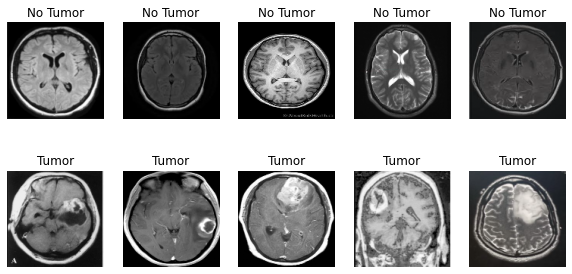

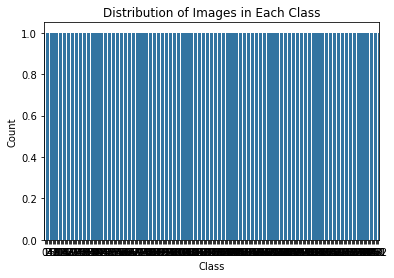

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(no_tumor_images[i])
    plt.axis('off')
    plt.title('No Tumor')

    plt.subplot(2, 5, i+6)
    plt.imshow(yes_tumor_images[i])
    plt.axis('off')
    plt.title('Tumor')
plt.show()

import seaborn as sns
sns.countplot(labels)
plt.title('Distribution of Images in Each Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## Building and Training the CNN Model


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

2024-07-28 01:10:59.169408: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-28 01:10:59.520101: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-28 01:10:59.597067: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/debjit/.local/lib/python3.10/site-packages/cv2/../../lib64:/opt/oracle/instantclient_21_4:

Epoch 1/20
7/7 [==============================] - 2s 186ms/step - loss: 0.6998 - accuracy: 0.6683 - val_loss: 0.5665 - val_accuracy: 0.7647
Epoch 2/20
7/7 [==============================] - 1s 179ms/step - loss: 0.4939 - accuracy: 0.8020 - val_loss: 0.5950 - val_accuracy: 0.7451
Epoch 3/20
7/7 [==============================] - 1s 169ms/step - loss: 0.4663 - accuracy: 0.7871 - val_loss: 0.5626 - val_accuracy: 0.7451
Epoch 4/20
7/7 [==============================] - 1s 172ms/step - loss: 0.4555 - accuracy: 0.7921 - val_loss: 0.5388 - val_accuracy: 0.7647
Epoch 5/20
7/7 [==============================] - 1s 173ms/step - loss: 0.4177 - accuracy: 0.8267 - val_loss: 0.5699 - val_accuracy: 0.7451
Epoch 6/20
7/7 [==============================] - 1s 176ms/step - loss: 0.3756 - accuracy: 0.8564 - val_loss: 0.5385 - val_accuracy: 0.7647
Epoch 7/20
7/7 [==============================] - 1s 172ms/step - loss: 0.3010 - accuracy: 0.8812 - val_loss: 0.5920 - val_accuracy: 0.7843
Epoch 8/20
7/7 [====

## Evaluation of the Model's Performance

2/2 [==============================] - 0s 40ms/step


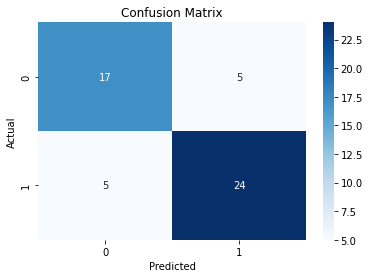

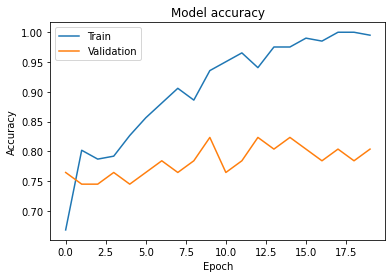

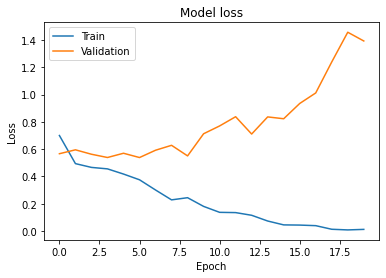

In [6]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

val_loss, val_accuracy = model.evaluate(X_val, y_val)

y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5).astype(int)

report = classification_report(y_val, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()

conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

##  Visualization of the Results


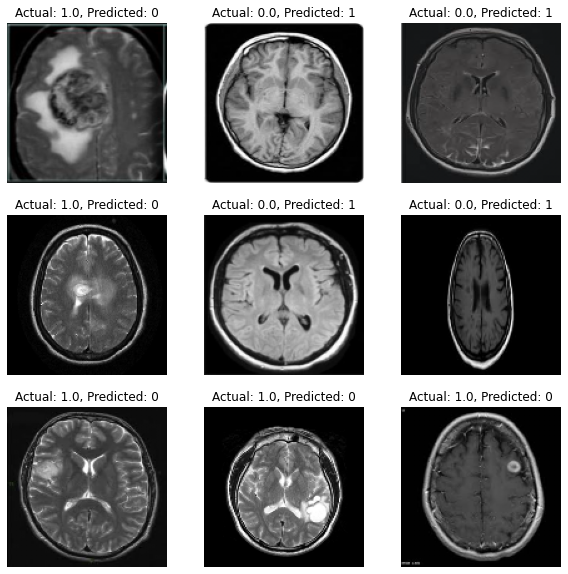

In [7]:
misclassified_indices = np.where(y_val != y_pred.flatten())[0]
plt.figure(figsize=(10, 10))
for i, index in enumerate(misclassified_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_val[index])
    plt.title(f'Actual: {y_val[index]}, Predicted: {y_pred[index][0]}')
    plt.axis('off')
plt.show()

### Conclusion
This notebook demonstrates the process of loading and preprocessing brain MRI images, performing exploratory data analysis, building and training a convolutional neural network for brain tumor detection, evaluating the model's performance, and visualizing the results.